夏目漱石の小説『吾輩は猫である』の文章（neko.txt）をMeCabを使って形態素解析し，その結果をneko.txt.mecabというファイルに保存せよ．このファイルを用いて，以下の問に対応するプログラムを実装せよ．

なお，問題37, 38, 39は[matplotlib](https://matplotlib.org/)もしくは[Gnuplot](http://www.gnuplot.info/)を用いるとよい．

In [29]:
import MeCab
import unidic

dic_path = unidic.DICDIR
tagger = MeCab.Tagger("-d '{}'".format(dic_path))


input_file = "neko.txt"
output_file = "neko.txt.mecab"

with open(input_file, "r", encoding="utf-8") as f_input, open(output_file, "w", encoding="utf-8") as f_output:
    for line in f_input:
        parsed_line = tagger.parse(line)  
        f_output.write(parsed_line)      

# 30. **形態素解析結果の読み込み**
形態素解析結果（neko.txt.mecab）を読み込むプログラムを実装せよ．ただし，各形態素は表層形（surface），基本形（base），品詞（pos），品詞細分類1（pos1）をキーとするマッピング型に格納し，1文を形態素（マッピング型）のリストとして表現せよ．第4章の残りの問題では，ここで作ったプログラムを活用せよ．

In [47]:
with open("neko.txt.mecab", "r", encoding="utf-8") as f:
    general_list = []
    temp_list = []
    lines = f.readlines()
    for text in lines:
        neko_dic = {}
        suf = text.split("\t")
        if suf[0] == "EOS\n":
            continue
        temp = suf[1].split(",")
        neko_dic["surface"] = suf[0]
        if len(temp) <= 7:
            neko_dic["base"] = suf[0]
        else:
            neko_dic["base"] = temp[7]
        neko_dic["pos"] = temp[0]
        neko_dic["pos1"] = temp[1]
        temp_list.append(neko_dic)
        if suf[0] == "。":
            general_list.append(temp_list)
            temp_list = []

print(general_list[:5])  

[[{'surface': '一', 'base': '一', 'pos': '名詞', 'pos1': '数詞'}, {'surface': '\u3000', 'base': '\u3000', 'pos': '空白', 'pos1': ''}, {'surface': '吾輩', 'base': '我が輩', 'pos': '代名詞', 'pos1': ''}, {'surface': 'は', 'base': 'は', 'pos': '助詞', 'pos1': '係助詞'}, {'surface': '猫', 'base': '猫', 'pos': '名詞', 'pos1': '普通名詞'}, {'surface': 'で', 'base': 'だ', 'pos': '助動詞', 'pos1': ''}, {'surface': 'ある', 'base': '有る', 'pos': '動詞', 'pos1': '非自立可能'}, {'surface': '。', 'base': '。', 'pos': '補助記号', 'pos1': '句点'}], [{'surface': '名前', 'base': '名前', 'pos': '名詞', 'pos1': '普通名詞'}, {'surface': 'は', 'base': 'は', 'pos': '助詞', 'pos1': '係助詞'}, {'surface': 'まだ', 'base': '未だ', 'pos': '副詞', 'pos1': ''}, {'surface': '無い', 'base': '無い', 'pos': '形容詞', 'pos1': '非自立可能'}, {'surface': '。', 'base': '。', 'pos': '補助記号', 'pos1': '句点'}], [{'surface': '\u3000', 'base': '\u3000', 'pos': '空白', 'pos1': ''}, {'surface': 'どこ', 'base': '何処', 'pos': '代名詞', 'pos1': ''}, {'surface': 'で', 'base': 'で', 'pos': '助詞', 'pos1': '格助詞'}, {'surface': '生れ', 'base'

# 31. **動詞**
動詞の表層形をすべて抽出せよ．

In [48]:
suf_list = []
for sentence in general_list:
    for i in range(len(sentence)):
        if sentence[i]["pos"] == "動詞":
            suf_list.append(sentence[i]["surface"])

verb = set(suf_list)
print(verb)

{'略し', '扱か', '突き当っ', '植付ける', '促がす', '在り', '話さ', '数え', 'ふかす', 'あてがえ', '保っ', '助かり', 'なっ', '栄える', '光ら', '見傚さ', 'くらす', '飲ま', '潜っ', '盗ら', '抜く', '遺し', 'け出す', '食い', '及ぼす', '塞っ', '差し支え', '剥げ', '叩き出す', '抛っ', '折れん', '撫でおろし', '坐っ', 'しまっ', '死ぬ', 'やん', '臨ん', '吹き込ん', '戻る', '思わ', '詰め込ん', '冒し', '利かす', '窮する', '心掛け', '逢う', '考え出そう', '舐める', '叱し', '授ける', '占め', '果せる', '合わせる', '読ま', '飛びつい', 'もぎとる', 'たたき', '書き', '有する', '罵り返す', '聞こう', '受け', '降っ', '知り', '踏み込ん', '見届け', '萌す', '斃れ', '握っ', '有り', '断て', '進む', '馴らし', '繙け', '懸ら', '傭っ', '困り', '追いつく', '挑む', '圧し', '偸み', '雑ぜ', '上り', '見出す', '勤め', '畏る', '終る', '寄り付ける', '誘い出す', '飲め', 'ふくらし', '鍛え上げ', '角張っ', '乱れ合う', '已む', '追い懸ける', '遊び', '跳ね返る', '糺し', '恃み', 'まくっ', '漕ぎ付け', 'たとえ', '思い出し', 'うて', '光る', '当る', '食い切っ', '歩み寄っ', 'よむ', '注ぎ', '応', '思い出せ', 'ごまかす', '突き合せ', 'あやまっ', '掻く', '憤る', '住ん', '醒め', '渡る', 'もらおう', 'かえっ', '澄し', 'かたちづくっ', 'なくなる', 'ころがり落ち', '労ら', '生れれ', '斬る', '話せ', '吹きかけ', '載っ', '厭き', '磨り潰し', '合わし', '憚り', '食わす', '覗き込む', 'とぼけ', 'つらまえる', '包み', 'こなせ', '落ちつか', '至る', '差し控え', '蓄える

# 32. **動詞の基本形**
動詞の基本形をすべて抽出せよ．

In [32]:
base_list = []
for sentence in general_list:
    for i in range(len(sentence)):
        if sentence[i]["pos"] == "動詞":
            base_list.append(sentence[i]["base"])

base = set(base_list)
print(base)

{'締め殺す', '預かる', '確かめる', '引っ繰り返す', '嵌まる', '生かす', '聞き出す', '沸き上がる', 'のさばり出る', '栄える', '抜く', '追い遣る', '及ぼす', '儲かる', '躄る', '叩き出す', '取り計らう', '死ぬ', '戻る', '窮する', '利かす', '授ける', '乗ずる', '突っ伏す', '捨て置く', '魘される', '引き戻す', '果せる', '合わせる', '担う', '有する', '思い掛ける', '罵り返す', '支える', '配る', '揉む', '暮れ掛かる', '進む', '狭める', '挑む', '隔たる', '刈る', '押し寄せる', '誘い出す', '乱れ合う', '取らす', '跳ね返る', '従う', '伏せる', '光る', 'ごろつく', '生む', '戯らす', 'ごまかす', '含む', '乗り回す', '掻く', '憤る', '渡る', '捩る', '止む', '食わす', '覗き込む', '至る', '蓄える', '敷く', '通す', '伸す', '蒸す', '呉れる', '欠く', '酔っ払う', '動く', '漏れる', '逃れる', '穿つ', '近寄る', '脅かす', '突っ張る', '重る', '振れる', '定める', '出向く', '引っ越す', '改める', '巡る', '乗り越す', '撓める', '舞う', '言い付ける', '濡れる', '伝う', '装う', '出直す', '重ねる', '剥がれる', '遣っ付ける', '思い及ぶ', '滅ぼす', '振り返る', 'くっ付ける', '受け合う', '打ち留める', '努める', '供する', 'へぐ', '埋まる', '躱す', '蹴出す', '暴く', '越す', '尖む', '通り掛かる', '覆う', '飛び下りる', '敵う', '書き流す', '振るう', '度する', '踏み込む', '清める', '申し渡す', '合う', '犇めく', '収める', '寝転ぶ', '企てる', '決める', '眠る', '祭り込む', '漏らす', '踏み付ける', '打ち抜く', '乗せる', '取る', '弾き出す', '乱す', '駆け込む', '食い下がる', '刈り込

# 33. **「AのB」**
2つの名詞が「の」で連結されている名詞句を抽出せよ．

In [33]:
no_list = []
for sentence in general_list:
    for i in range(1, len(sentence) - 1):
        if sentence[i]["surface"] == "の" and sentence[i-1]["pos"] == "名詞" and sentence[i+1]["pos"] == "名詞":
            no_list.append(sentence[i-1]["surface"] + "の" + sentence[i+1]["surface"])

print(no_list)

['掌の上', '書生の顔', 'はずの顔', '顔の真中', '穴の中', '書生の掌', '掌の裏', '藁の上', '笹原の中', '池の前', '一樹の蔭', '垣根の穴', '隣家の三毛', '時の通路', '一刻の猶予', '家の内', '以外の人間', '前の書生', '胸の痞', '家の主人', '主人の方', 'なしの小猫', '鼻の下', '自分の住家', '家のもの', 'うちのもの', '本の上', '皮膚の色', '本の上', '以外のもの', '主人の傍', '膝の上', '経験の上', '飯櫃の上', '炬燵の上', 'うちの小供', '小供の寝床', '小供の一人', '例の神経', '次の部屋', '自分の勝手', 'へっついの中', '台所の板の間', '家の書生', '裏の池', '親子の愛', '隣りの三毛', '目刺の頭', '鰡の臍', '軍人の家', '代言の主人', '教師の家', '猫の時節', '家の主人', '胃弱の癖', '後架の中', '平の宗盛', '月の月給', '主人の述懐', '金縁の眼鏡', '主人の顔', '室内の想像', '訳のもの', '利の大家', '金縁の裏', '顔のあたり', '上乗の出来', '顔の造作', '他の猫', '斑入りの皮膚', '主人の彩色', '一種の色', '身内の筋肉', '主人の予定', '座敷の中', '人の気', '自己の力量', '人間の不徳', '家の裏', 'うちの小供', '日の二', 'たこの茶園', '茶の木', '木の根', '西側の杉垣', '杉垣のそば', '他の庭内', '皮膚の上', '柔毛の間', '嘆賞の念', '好奇の心', '小春の風', '杉垣の上', '梧桐の枝', '枯菊の茂み', '真丸の眼', '人間の珍重', '双眸の奥', '額の上', '声の底', '教師の家', '良家の猫', '車屋の黒', '車屋の黒', '主義の的', '軽侮の念', '左の問答', '車屋の方', 'うちの主人', '車屋の猫', '教師の方', '腹の足し', '車屋の黒', '相当の気焔', '茶畠の中', '黒の比較', '鼻の先', '自分の手柄', '墻壁の欠', '鼠の百', '掃除の時', 'うちの亭主', '石灰の袋',

# 34. **名詞の連接**
名詞の連接（連続して出現する名詞）を最長一致で抽出せよ．

In [34]:
import itertools

verb_dict = []
sentence_dict = itertools.chain.from_iterable(general_list)
# 名詞の連接
noun_connect = []

# 一覧
noun_seq = []
for sentence in sentence_dict:
    if sentence["pos"] == "名詞":
        noun_connect.append(sentence["surface"])
    elif len(noun_connect) > 1:
        noun_seq.append(noun_connect)
        noun_connect = []
    else: 
        noun_connect = []
        continue

for max_noun in noun_seq:
    print(*max_noun)

時 妙
一 毛
後 猫
一 度
上 今
うち 池の上
左 り
書生 以外
宿 なし
まま 奥
終日 書斎
時々 忍び足
淡黄 色
二三 ページ
主人 以外
朝 主人
椽 側
一 間
神経 胃弱
時々 同衾
言語 同断
家内 総がかり
先日 玉
一部 始終
新体 詩
後架 先生
一 月
月給 日
水彩 絵具
毎日 毎日 書斎
自ら 筆
眼鏡 越
一 室内
以太 利
大家 アンドレア
星辰 あり
禽 あり
金魚 あり
寒鴉 あり
一 幅
椽 側
一 分
淡灰 色
今 主人
上 不思議
盲 猫
いくら アンドレア
一 分
あと 大
馬鹿 野郎
馬鹿 野郎
馬鹿 野郎 呼 わり
馬鹿 野郎
みんな 増長
数 倍
十 坪
腹 加減
二 時 頃
前後 不覚
少々 言葉
乱暴 猫
同盟 敬遠 主義
ゆき 感じ
少々 軽侮
車屋 相当
不徳 事件
日 例
自慢 話し
手柄 話
年が 年
一 度 いたち
最後 っ屁
百 年
五 銭
壱 円 五十 銭
少々 気味
鼠 以外
水彩 画
十 二 月 一日
水彩 画
水彩 画家
水彩 画
通人 論
水彩 画
主人 はかく
十 二 月 四
水彩 画
通り 下手
水彩 画
水彩 画家
水彩 画
翌日 例
金縁 眼鏡
結果 今日
アンド レア
椽 側
サルト 事件
時々 冗談
仏国 革命
日本 文学 会
演説 会
百 名
歴史 小説 セオファーノ
歴史 小説
女 主人
神経 胃弱
時ゃ 別
模様 画
実際 奇警
半分 降参
後 跛
最後 屁
天秤 棒
二三 段
三 間 半
椽 側
毎日 学校
元朝 早々 主人
絵 端書
交友 某 画家
深緑 り
一応 感服
三 世相
絵 端書
絵 端書
いくら 猫
一 列 一体
自家 固有
張り 具合
垂れ 加減
粋 無粋
千差 万別
一 義
征 露
二 年
大方 熊
絵 端書
春 一 日
旧門 下生
はてな 今年
絵 端書
恭賀 新年
伝声 奉願
多少 尊敬
方 来客
高利 貸
旧 門下
時々 相槌
黒 木綿
紋付 羽織
べん べら
五 分
合奏 会
三 挺
三 挺
平常 枯木 寒 巌
一人 物
七 割
半分 前歯
女 連
黒 木綿
紋付 羽織
二十 年 来着
結城 紬
結城 紬
余所 ゆき
普通 一般
桃 川
燕 以後
餅 菓子
四五 日 前
主人 夫婦
毎朝 主人
砂糖 壺
一 匙
通り 同 分量
同 方法


# 35. **単語の出現頻度**
文章中に出現する単語とその出現頻度を求め，出現頻度の高い順に並べよ．

In [35]:
import collections

word_list = []
for sentence in general_list:
    for i in range(len(sentence)):
        word_list.append(sentence[i]["surface"])

counter = collections.Counter(word_list)
print(counter.most_common())

[('の', 9550), ('。', 7486), ('て', 7416), ('に', 7017), ('、', 6773), ('は', 6500), ('と', 6160), ('を', 6119), ('が', 5399), ('で', 4537), ('た', 3988), ('も', 3253), ('「', 3238), ('」', 3238), ('だ', 2719), ('し', 2536), ('ない', 2422), ('から', 2217), ('か', 2050), ('ある', 1726), ('ん', 1662), ('な', 1614), ('いる', 1255), ('事', 1212), ('する', 1055), ('もの', 1004), ('へ', 995), ('です', 977), ('君', 971), ('云う', 937), ('主人', 934), ('何', 715), ('御', 707), ('ね', 693), ('よう', 683), ('—', 666), ('この', 655), ('その', 620), ('それ', 612), ('ば', 600), ('そう', 570), ('い', 552), ('なる', 538), ('よ', 498), ('一', 490), ('なら', 486), ('人', 486), ('吾輩', 481), ('さ', 480), ('これ', 472), ('ます', 462), ('じゃ', 447), ('…', 433), ('どう', 413), ('\u3000', 411), ('なっ', 408), ('さん', 401), ('来', 383), ('ところ', 383), ('見', 366), ('時', 351), ('ず', 345), ('迷亭', 343), ('って', 333), ('ませ', 333), ('方', 321), ('いい', 319), ('なく', 313), ('まで', 312), ('れ', 304), ('上', 298), ('寒月', 286), ('まし', 283), ('人間', 279), ('顔', 277), ('先生', 274), ('見る', 273), ('ぬ', 27

# 36. **頻度上位10語**
出現頻度が高い10語とその出現頻度をグラフ（例えば棒グラフなど）で表示せよ．

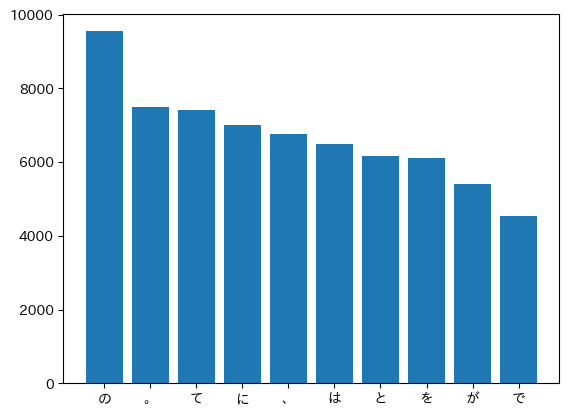

In [40]:
import matplotlib.pyplot as plt

top_10_freqs = counter.most_common(10)
top_10_words = [word for word, freq in top_10_freqs]
top_10_counts = [freq for word, freq in top_10_freqs]

plt.bar(top_10_words, top_10_counts)
plt.show()


# 37. **「猫」と共起頻度の高い上位10語**
「猫」とよく共起する（共起頻度が高い）10語とその出現頻度をグラフ（例えば棒グラフなど）で表示せよ．

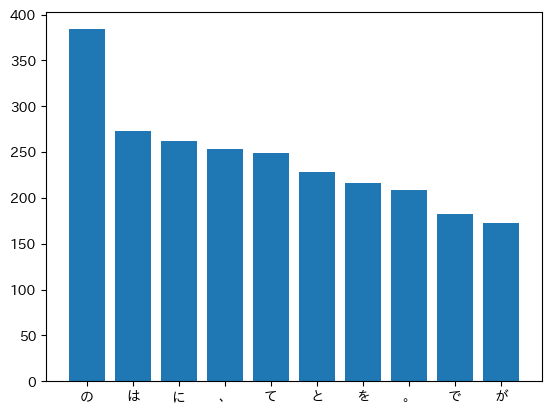

In [43]:
import matplotlib.pyplot as plt
from collections import Counter

# 猫と共起する単語の出現頻度をカウント
co_occurrence = Counter()
for sentence in general_list:
    words = [word["surface"] for word in sentence]
    if "猫" in words:
        co_occurrence.update(words)

# 猫を除く
del co_occurrence["猫"]

top_10_cat = co_occurrence.most_common(10)
top_10_cat_words = [word for word, freq in top_10_cat]
top_10_cat_counts = [freq for word, freq in top_10_cat]

plt.bar(top_10_cat_words, top_10_cat_counts)
plt.show()

# 38. **ヒストグラム**
単語の出現頻度のヒストグラムを描け．ただし，横軸は出現頻度を表し，1から単語の出現頻度の最大値までの線形目盛とする．縦軸はx軸で示される出現頻度となった単語の異なり数（種類数）である．

(array([6608., 2272., 1126.,  663.,  513.,  325.,  285.,  210.,  140.,
         119.,  108.,  103.,  101.,   91.,   63.,   68.,   59.,   63.,
          37.,   44.,   31.,   30.,   30.,   35.,   34.,   25.,   22.,
          24.,   19.,   17.]),
 array([ 1.        ,  1.96666667,  2.93333333,  3.9       ,  4.86666667,
         5.83333333,  6.8       ,  7.76666667,  8.73333333,  9.7       ,
        10.66666667, 11.63333333, 12.6       , 13.56666667, 14.53333333,
        15.5       , 16.46666667, 17.43333333, 18.4       , 19.36666667,
        20.33333333, 21.3       , 22.26666667, 23.23333333, 24.2       ,
        25.16666667, 26.13333333, 27.1       , 28.06666667, 29.03333333,
        30.        ]),
 <BarContainer object of 30 artists>)

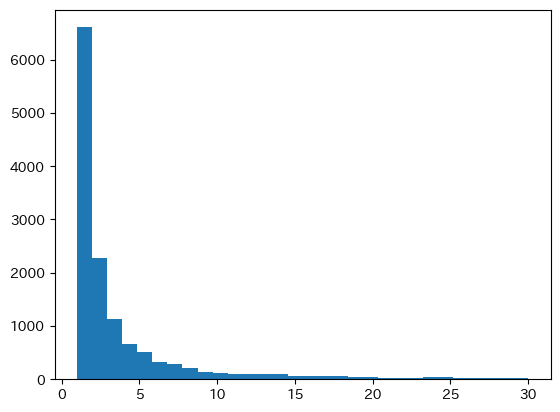

In [45]:
import matplotlib.pyplot as plt
from collections import Counter

word_list = []
for sentence in general_list:
    for i in range(len(sentence)):
        word_list.append(sentence[i]["surface"])

data = collections.Counter(word_list)
plt.hist(data.values(), bins=30, range=(1, 30))

# 39. **Zipfの法則**
単語の出現頻度順位を横軸，その出現頻度を縦軸として，両対数グラフをプロットせよ．

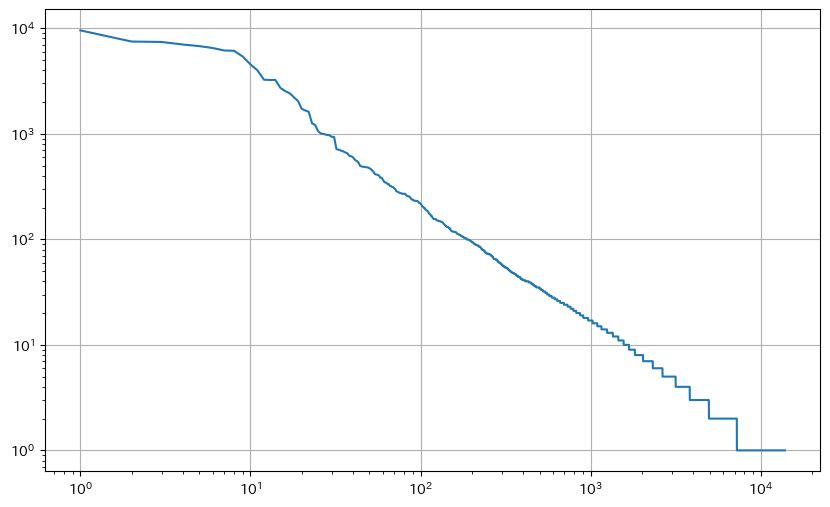

In [ ]:
import matplotlib.pyplot as plt
from collections import Counter

word_list = []
for sentence in general_list:
    for i in range(len(sentence)):
        word_list.append(sentence[i]["surface"])

# 単語の出現頻度順位を取得
freqs = list(counter.values())
freqs.sort(reverse=True)

plt.figure(figsize=(10, 6))
plt.loglog(range(1, len(freqs) + 1), freqs)
plt.grid(True)
plt.show()